In [1]:
import nltk
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv('Set_1.csv')
df2 = pd.read_csv('Set_2.csv')
df3 = pd.read_csv('Set_3.csv')
df4 = pd.read_csv('Set_4.csv')
df5 = pd.read_csv('Set_5.csv')

In [3]:
df = pd.concat([df1,df2,df3,df4,df5])

In [4]:
df.reset_index(inplace=True, drop=True) 

In [5]:
df.head(5)

,Date,ID,Is_RT,Length,Retweets,Source,Tweet,Unnamed: 0
0,10-01-2019 21:23,1.083470e+18,1,198,94,Twitter for Android,📍Lok Sabha\r\n |\r\n |\r\n | _ _ _ _ _ _ _ ...,NaN
1,10-01-2019 21:22,1.083470e+18,1,251,17,Twitter for iPhone,Someone once told me TN always electing Region...,NaN
2,10-01-2019 21:22,1.083470e+18,0,155,0,Twitter for Android,"Family, community filled with questions after ...",NaN
3,10-01-2019 21:18,1.083470e+18,1,143,21,Twitter for Android,This is Modis #Reservation formula😂.\r\n#India...,NaN
4,10-01-2019 21:16,1.083470e+18,1,149,33,Twitter for Android,What about the 4.5 % #Reservation given to min...,NaN


In [6]:
#Clean Tweet
Clean_Tweet = []
for i in df.Tweet:
    Clean_Tweet.append(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", i.lower()).split()))
df['Clean_Tweet'] = Clean_Tweet


In [7]:
#Removing the stopword
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_tweet = [w for w in df.Clean_Tweet if not w in stop_words]

In [8]:
df['filtered_tweet'] = filtered_tweet

In [9]:
df[95:105]

,Date,ID,Is_RT,Length,Retweets,Source,Tweet,Unnamed: 0,Clean_Tweet,filtered_tweet
95,10-01-2019 17:52,1.083420e+18,1,275,264,Twitter for iPhone,He ruled Gujarat for 15 years as a chief minis...,NaN,he ruled gujarat for 15 years as a chief minis...,he ruled gujarat for 15 years as a chief minis...
96,10-01-2019 17:52,1.083420e+18,0,268,0,Twitter for Android,#Reservation 1. 50% reservation for SC+ST+OBC...,NaN,reservation 1 50 reservation for sc st obc i e...,reservation 1 50 reservation for sc st obc i e...
97,10-01-2019 17:49,1.083420e+18,1,209,1,Twitter for iPhone,#ReservationforUpperCaste: The word is not eno...,NaN,reservationforuppercaste the word is not enoug...,reservationforuppercaste the word is not enoug...
98,10-01-2019 17:49,1.083420e+18,0,301,0,Twitter for Android,Many say they've no #Reservation if #CBIBossSa...,NaN,many say they ve no reservation if cbibosssack...,many say they ve no reservation if cbibosssack...
99,10-01-2019 17:48,1.083420e+18,0,260,0,Twitter Web Client,"Here's how SC, ST, OBC should beat upper catse...",NaN,here s how sc st obc should beat upper catse i...,here s how sc st obc should beat upper catse i...
100,11-01-2019 06:45,1.083620e+18,0,63,0,Twitter for Android,@IndiaToday Only solution stop #Reservation fo...,NaN,only solution stop reservation for all categories,only solution stop reservation for all categories
101,11-01-2019 06:43,1.083620e+18,1,251,114,Twitter for Android,Someone once told me TN always electing Region...,NaN,someone once told me tn always electing region...,someone once told me tn always electing region...
102,11-01-2019 06:42,1.083620e+18,1,280,884,Twitter for Android,They said Jan Dhan is fail.\r\nThey said Swach...,NaN,they said jan dhan is fail they said swachh bh...,they said jan dhan is fail they said swachh bh...
103,11-01-2019 06:40,1.083610e+18,1,131,7,Twitter for Android,SC had in the 1992 ruling said that poverty al...,NaN,sc had in the 1992 ruling said that poverty al...,sc had in the 1992 ruling said that poverty al...
104,11-01-2019 06:40,1.083610e+18,1,131,7,Twitter for Android,SC had in the 1992 ruling said that poverty al...,NaN,sc had in the 1992 ruling said that poverty al...,sc had in the 1992 ruling said that poverty al...


In [10]:
count = 0
for i in df.Tweet:
    if '@' in i:
        count = count + 1
print(count)

155


In [11]:
count = 0
for i in df.Tweet:
    if '#Modi' in i:
        count = count + 1
print(count)

45


In [12]:
count = 0
for i in df.Tweet:
    if '#Reservation' or '#reservation' in i:
        count = count + 1
print(count)

500


In [13]:
BJP_count = 0
for i in df.Tweet:
    if ('BJP' or 'bjp') in i:
        BJP_count = BJP_count + 1
print(BJP_count)

49


In [14]:
congress_count = 0
for i in df.Clean_Tweet:
    if 'congress' in i:
        congress_count = congress_count + 1
print(congress_count)

17


In [15]:
count = 0
for i in df.Tweet:
    if  ('Vikas'or 'vikas' or 'VIKAS') in i:
        count = count + 1
print(count)

9


In [16]:
count = 0
for i in df.Tweet:
    if ('jobs' or 'Jobs') in i:
        count = count + 1
print(count)

31


In [17]:
count = 0
for i in df.Tweet:
    if '@narendramodi' in i:
        count = count + 1
print(count)

72


In [18]:
Hashtag_count = 0
c = 0
for i in df.Tweet:
    c = i.count('#')
    Hashtag_count = Hashtag_count + c   
    c = 0
print(Hashtag_count)

1557


In [19]:
Mentions_Count = 0
for i in df.Tweet:
    if '@' in i:
        Mentions_Count = Mentions_Count + 1
print(Mentions_Count)

155


In [20]:
count = 0
for i in df.Tweet:
    if '#QuotaBill' in i:
        count = count + 1
print(count)

93


In [21]:
#Andorid vs #Iphone
Android_User = df[df.Source == 'Twitter for Android'].shape[0]
Iphone_User = df[df.Source == 'Twitter for iPhone'].shape[0]
Rest = len(df) - (Android_User + Iphone_User)
print(Android_User)
print(Iphone_User)
print(Rest)

361
48
91


In [22]:
Android_RT = df[df.Source == 'Twitter for Android'].Retweets.sum()
Iphone_RT = df[df.Source == 'Twitter for iPhone'].Retweets.sum()
Rest_RT = (df.Retweets.sum() - (df[df.Source == 'Twitter for Android'].Retweets.sum() + (df[df.Source == 'Twitter for iPhone'].Retweets.sum())))

In [23]:
#Avg retweet_count of a tweet coming from an Android User/Iphone/Rest
Avg_Android_User_Retweet_Count = Android_RT/Android_User
Avg_Iphone_User_Retweet_Count = Iphone_RT/Iphone_User
Avg_Rest_User_Retweet_Count =  Rest_RT/Rest
print(Avg_Android_User_Retweet_Count)
print(Avg_Iphone_User_Retweet_Count)
print(Avg_Rest_User_Retweet_Count)

111.34626038781164
146.39583333333334
152.83516483516485


In [24]:
#Most Popular Tweet
for i in df[df.Retweets == df.Retweets.max()].Tweet:
    print(i)
print('Total Retweets : ',df.Retweets.max())

10% #Reservation for economically weaker sections is a MASTER-JUMLA

Modi govt failed at giving jobs. If there are no jobs in the first place, what will any caste, any economic section get?  10% of Zero is still a Zero.
Total Retweets :  2735


In [25]:
df.Is_RT.value_counts()

1    432
0     68
Name: Is_RT, dtype: int64

In [26]:
Android_Tweets = df[df.Source == 'Twitter for Android'][df.Is_RT == 0].shape[0]
Android_Tweets

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


43

In [27]:
iPhone_Tweets = df[df.Source == 'Twitter for iPhone'][df.Is_RT == 0].shape[0]
iPhone_Tweets

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


2

In [28]:
#Total Tweets from Android
Android_Retweets = Android_User - Android_Tweets
Avg_Android_Tweets = Android_Tweets/Android_User
Avg_Android_Retweets = Android_Retweets/Android_User
print(Android_Retweets)
print(Android_Tweets)
print(Avg_Android_Tweets)
print(Avg_Android_Retweets)

318
43
0.11911357340720222
0.8808864265927978


In [29]:
#Total Tweets from iPhone
Iphone_Retweets = Iphone_User - iPhone_Tweets
Avg_Iphone_Tweets = iPhone_Tweets/Iphone_User
Avg_Iphone_Retweets = Iphone_Retweets/Iphone_User
print(Iphone_Retweets)
print(iPhone_Tweets)
print(Avg_Iphone_Tweets)
print(Avg_Iphone_Retweets)

46
2
0.041666666666666664
0.9583333333333334


In [30]:
#Avg_Iphone_Tweets > #Total Tweets from iPhone
#So on an average we can conclude that an Iphone User is likely to Tweet More while an Android user is likely to tweet more.

In [31]:
df.head()

,Date,ID,Is_RT,Length,Retweets,Source,Tweet,Unnamed: 0,Clean_Tweet,filtered_tweet
0,10-01-2019 21:23,1.083470e+18,1,198,94,Twitter for Android,📍Lok Sabha\r\n |\r\n |\r\n | _ _ _ _ _ _ _ ...,NaN,lok sabha women s reservation bill 10 reservat...,lok sabha women s reservation bill 10 reservat...
1,10-01-2019 21:22,1.083470e+18,1,251,17,Twitter for iPhone,Someone once told me TN always electing Region...,NaN,someone once told me tn always electing region...,someone once told me tn always electing region...
2,10-01-2019 21:22,1.083470e+18,0,155,0,Twitter for Android,"Family, community filled with questions after ...",NaN,family community filled with questions after t...,family community filled with questions after t...
3,10-01-2019 21:18,1.083470e+18,1,143,21,Twitter for Android,This is Modis #Reservation formula😂.\r\n#India...,NaN,this is modis reservation formula indiasupport...,this is modis reservation formula indiasupport...
4,10-01-2019 21:16,1.083470e+18,1,149,33,Twitter for Android,What about the 4.5 % #Reservation given to min...,NaN,what about the 4 5 reservation given to minori...,what about the 4 5 reservation given to minori...


In [32]:
x_pos1 = [0,2,4]
y_pos1 = [Android_User,Iphone_User,Rest]

In [33]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

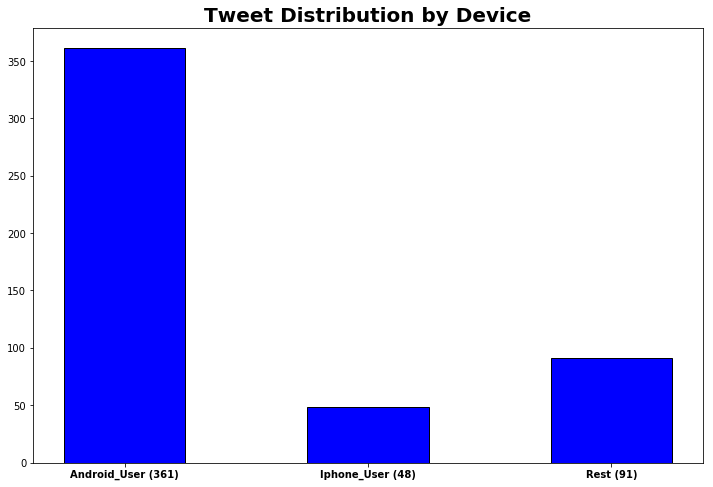

In [49]:
plt.bar(x_pos1,y_pos1, width = 1, color = 'blue', edgecolor = 'black', capsize=7)
plt.xticks(x_pos1, ['Android_User '+ '(' + str(Android_User) + ')', 'Iphone_User '+'(' + str(Iphone_User)+ ')', 'Rest '+'(' +str(Rest)+ ')'],fontweight = 'bold')
plt.title('Tweet Distribution by Device',size = 20, fontweight = 'bold')
plt.show()

In [51]:
y_pos2 = [Android_RT,Iphone_RT,Rest_RT]

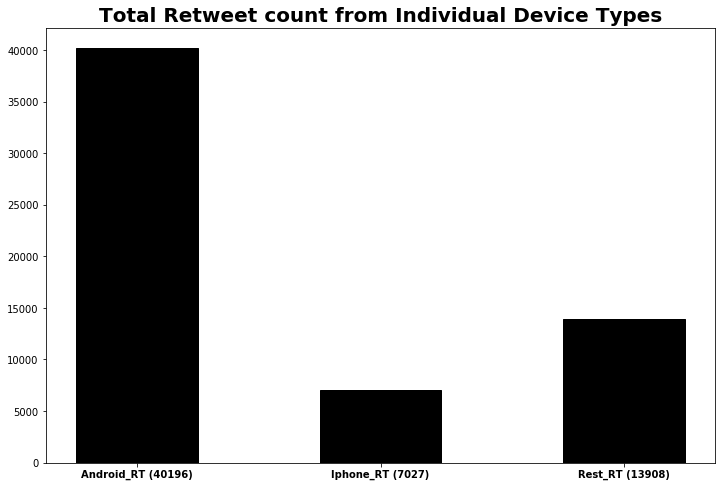

In [54]:
plt.bar(x_pos1,y_pos2, width = 1, color = 'black', edgecolor = 'black', capsize=7)
plt.xticks(x_pos1, ['Android_RT '+ '(' + str(Android_RT) + ')', 'Iphone_RT '+'(' + str(Iphone_RT)+ ')', 'Rest_RT '+'(' +str(Rest_RT)+ ')'],fontweight = 'bold')
plt.title('Total Retweet count from Individual Device Types',size = 20, fontweight = 'bold')
plt.show()

In [37]:
z_pos2 = [Avg_Android_User_Retweet_Count,Avg_Iphone_User_Retweet_Count,Avg_Rest_User_Retweet_Count]

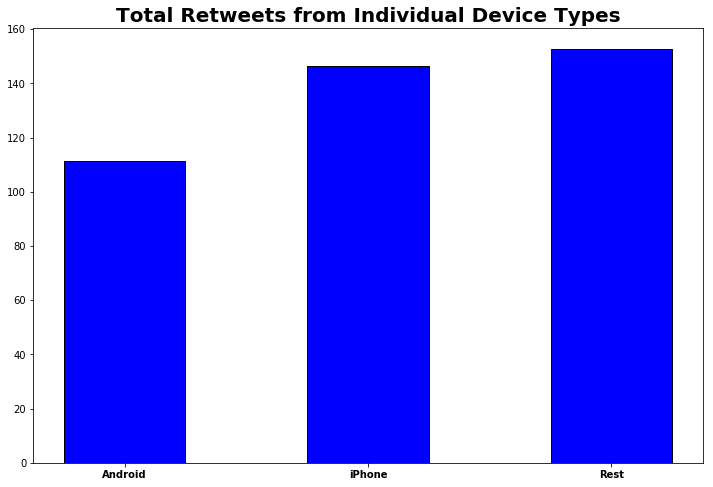

In [38]:
plt.bar(x_pos1,z_pos2, width = 1, color = 'blue', edgecolor = 'black', capsize=7)
plt.xticks(x_pos1, ['Android', 'iPhone', 'Rest'],fontweight = 'bold')
plt.title('Total Retweets from Individual Device Types',size = 20, fontweight = 'bold')
plt.show()

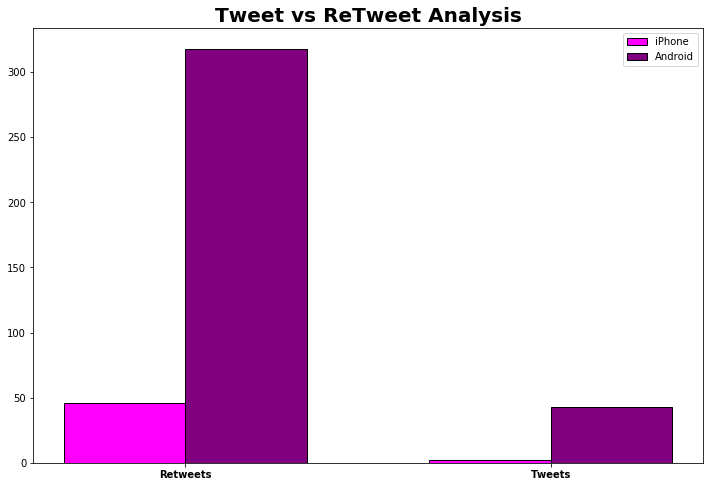

In [39]:
x_pos2 = [0,3]
x_pos3 = [1,4]
plt.bar(x_pos2,[Iphone_Retweets,iPhone_Tweets], width = 1, color = 'magenta', edgecolor = 'black', capsize=7, label = 'iPhone')
plt.bar(x_pos3,[Android_Retweets,Android_Tweets], width = 1, color = 'purple', edgecolor = 'black', capsize=7, label = 'Android')
plt.xticks([0.5,3.5], ['Retweets','Tweets'],fontweight = 'bold')
plt.title('Tweet vs ReTweet Analysis',size = 20, fontweight = 'bold')
plt.legend()

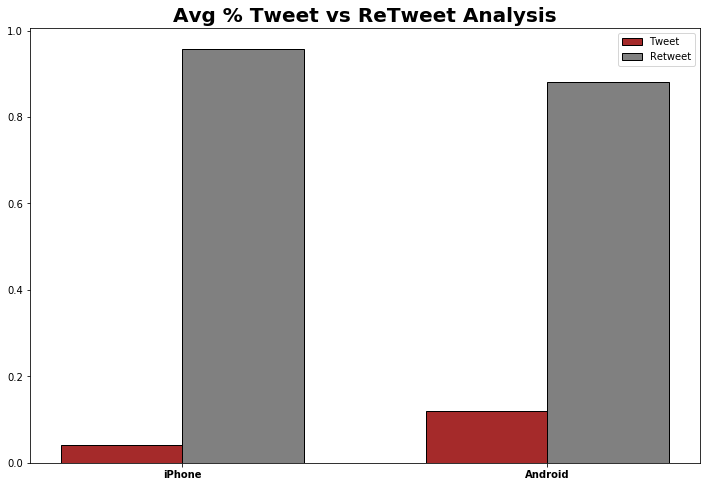

In [55]:
plt.bar(x_pos2,[Avg_Iphone_Tweets,Avg_Android_Tweets], width = 1, color = 'brown', edgecolor = 'black', capsize=7, label = 'Tweet')
plt.bar(x_pos3,[Avg_Iphone_Retweets,Avg_Android_Retweets], width = 1, color = 'grey', edgecolor = 'black', capsize=7, label = 'Retweet')
plt.xticks([0.5,3.5], ['iPhone','Android'],fontweight = 'bold')
plt.title('Avg % Tweet vs ReTweet Analysis',size = 20, fontweight = 'bold')
plt.legend()

In [41]:
from textblob import TextBlob

In [42]:
def sentiment_analysis(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [43]:
df['sentiment'] = np.array([sentiment_analysis(tweet) for tweet in df['filtered_tweet']])

In [44]:
df.sentiment.value_counts()

 1    271
 0    121
-1    108
Name: sentiment, dtype: int64

In [45]:
Sentiments_count = list(df.sentiment.value_counts())

In [46]:
Sentiments_count

[271, 121, 108]

In [47]:
Sentiments = list(df.sentiment.value_counts(1).values*100)
Positive_Sentiment = Sentiments[0]
Neutral_Sentiment = Sentiments[1]
Negative_Sentiment = Sentiments[2]

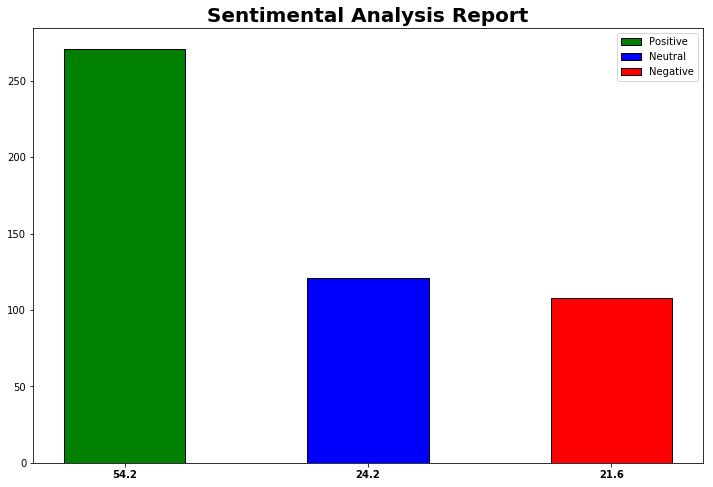

In [48]:
plt.bar(2,Sentiments_count[0],width = 1, color = 'green', edgecolor = 'black', capsize=7, label='Positive')
plt.bar(4,Sentiments_count[1],width = 1, color = 'blue', edgecolor = 'black', capsize=7, label = 'Neutral')
plt.bar(6,Sentiments_count[2],width = 1, color = 'red', edgecolor = 'black', capsize=7, label ='Negative')
plt.xticks([2,4,6], [Positive_Sentiment, Neutral_Sentiment, Negative_Sentiment],fontweight = 'bold')
plt.title('Sentimental Analysis Report',size = 20, fontweight = 'bold')
plt.legend()
plt.show()